<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_arquitetura_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Importando as bibliotecas de interesse

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.metrics import MeanRelativeError
from keras.initializers import Ones, glorot_uniform, he_normal, Zeros

In [29]:
#Carregando o dataset e separando em teste e treino
df = pd.read_csv('data_cov (1).csv')
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:86], x[86:]
y_treino, y_teste = y[0:86], y[86:]

#x_treino, x_teste, y_treino, y_teste, = train_test_split(x , y, test_size = 10, random_state = None)
#Colocando em ordem crescente e normalizando
'''
x_treino.insert(5, 'Cov',y_treino)
x_treino = x_treino.sort_values(by='flow_distance_ratio')
print(x_treino)

y_treino = x_treino['Cov']
x_treino = x_treino.drop('Cov', axis = 1)
'''

scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [38]:
#Rede neural


def rede_neural(x_treino, y_treino, x_teste, y_teste, a):
  # Adicionar a camadas ocultas com 10 nós cada, de acordo com Su
  modelo = Sequential()
  modelo.add(tf.keras.layers.Input(shape=(x_treino.shape[1],)))
  initializer = tf.keras.initializers.Ones()
  for _ in range(a):
    modelo.add(Dense(units=10, activation='linear', kernel_initializer = Zeros()))

  modelo.add(Dense(units=1, activation='linear'))

  # Treinando a rede neural:
  optimizer = keras.optimizers.SGD(learning_rate=0.005)

  modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
  resultado = modelo.fit(x_treino, y_treino, epochs=350, batch_size=10, validation_data=(x_teste, y_teste))
  #Pegando os valores do erro
  loss = resultado.history['loss'][349]; val_loss = resultado.history['val_loss'][349]
  mae = resultado.history['mae'][349]; val_mae = resultado.history['val_mae'][349]
  y_pred = modelo.predict(x_treino)
  y_pred = pd.DataFrame(y_pred)


  erro_relativo = 0
  for i in range(len(y_treino)):
    erro_relativo += (np.abs(y_treino[i]- y_pred[0][i])/y_treino[i])
  erro_relativo = (erro_relativo/len(y_treino))

  return loss, val_loss, mae, val_mae, resultado, erro_relativo
  #return loss, val_loss, mae, val_mae, resultado

In [39]:
#Analisando os valores dos erros
loss = []
val_loss = []
mae = []
val_mae = []
erro_relativo = []
a = []
for i in range (2, 17):
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, aux_erro_relativo = rede_neural(x_treino_normalizado, y_treino, x_teste_normalizado, y_teste, i)
  #aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado = rede_neural(x_treino_normalizado, y_treino, x_teste_normalizado, y_teste, i)
  loss.append(aux_loss)
  val_loss.append(aux_val_loss)
  mae.append(aux_mae)
  val_mae.append(aux_val_mae)
  erro_relativo.append(aux_erro_relativo)
  a.append(i)

print(loss)

A saída de streaming foi truncada nas últimas 5000 linhas.
9/9 [==============================] - 0s 13ms/step - loss: 0.0043 - mae: 0.0220 - val_loss: 0.0010 - val_mae: 0.0252
Epoch 306/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0220 - val_loss: 9.6439e-04 - val_mae: 0.0240
Epoch 307/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0227 - val_loss: 8.9382e-04 - val_mae: 0.0227
Epoch 308/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0230 - val_loss: 9.4363e-04 - val_mae: 0.0236
Epoch 309/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0225 - val_loss: 9.5444e-04 - val_mae: 0.0238
Epoch 310/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0043 - mae: 0.0228 - val_loss: 9.4353e-04 - val_mae: 0.0236
Epoch 311/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0043 - mae: 0.0231 - val_loss: 8.6158e-04 - val_mae: 0.0221
Epoch 31

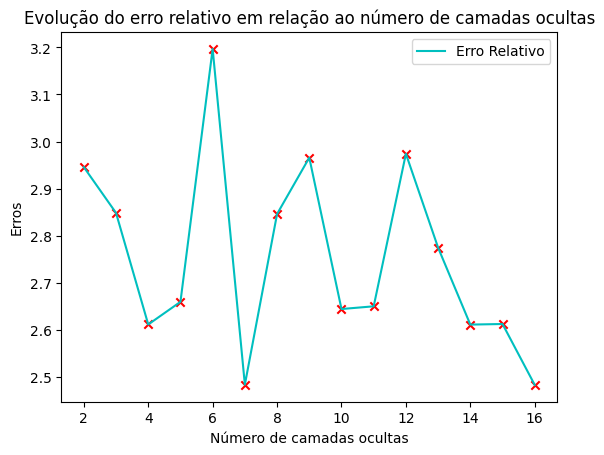

[2.9455714890546494, 2.8480715022171026, 2.6107587420085134, 2.6588917206950113, 3.1969603457371587, 2.4827229155828774, 2.84573777485394, 2.9656784095042066, 2.643617902571673, 2.649391386725547, 2.973938170445323, 2.7741505771916306, 2.6105002953191114, 2.6117493062957307, 2.4821499796208393]


In [44]:
#Plotando o gráfico com os erros

plt.plot(a, erro_relativo, c='c')
plt.scatter(a, erro_relativo, marker='x', c='r', label = 'Pontos')
plt.title('Evolução do erro relativo em relação ao número de camadas ocultas')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['Erro Relativo'])
plt.show()
print(erro_relativo)

In [42]:
#Sabendo que o erro fica menor em 10 camadas ocultas, o passo agora é definir uma função pra uma segunda rede neural, mas agora variando o numero de neuronios

def rede_neural2(x_treino, y_treino, x_teste, y_teste, nos):
  # Adicionar a camadas ocultas com 11 nós cada, de acordo com Su
  modelo = Sequential()
  for _ in range(16):
    modelo.add(Dense(units=nos, activation='linear', kernel_initializer = Zeros(), input_dim=x_treino.shape[1]))

  modelo.add(Dense(units=1, activation='linear'))

  # Treinando a rede neural:
  optimizer = keras.optimizers.SGD(learning_rate=0.005)

  modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
  resultado = modelo.fit(x_treino, y_treino, epochs=350, batch_size=10, validation_data=(x_teste, y_teste))
  #Pegando os valores do erro
  loss = resultado.history['loss'][349]; val_loss = resultado.history['val_loss'][349]
  mae = resultado.history['mae'][349]; val_mae = resultado.history['val_mae'][349]

  y_pred = modelo.predict(x_treino)
  y_pred = pd.DataFrame(y_pred)


  erro_relativo = 0
  for i in range(len(y_treino)):
    erro_relativo += (np.abs(y_treino[i]- y_pred[0][i])/y_treino[i])
  erro_relativo = (erro_relativo/len(y_treino))


  return loss, val_loss, mae, val_mae, resultado, erro_relativo
  #return loss, val_loss, mae, val_mae, resultado

In [43]:
#Analisando os valores dos erros
loss_n = []
val_loss_n = []
mae_n = []
val_mae_n = []
erro_relativo_n = []

n = []
for i in range (10, 70, 5):
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, aux_erro_relativo = rede_neural2(x_treino, y_treino, x_teste, y_teste, i)
  #aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado = rede_neural2(x_treino, y_treino, x_teste, y_teste, i)
  loss_n.append(aux_loss)
  val_loss_n.append(aux_val_loss)
  mae_n.append(aux_mae)
  val_mae_n.append(aux_val_mae)
  erro_relativo_n.append(aux_erro_relativo)
  n.append(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
9/9 [==============================] - 0s 12ms/step - loss: 0.0043 - mae: 0.0232 - val_loss: 8.8498e-04 - val_mae: 0.0225
Epoch 306/350
9/9 [==============================] - 0s 14ms/step - loss: 0.0043 - mae: 0.0230 - val_loss: 9.5636e-04 - val_mae: 0.0239
Epoch 307/350
9/9 [==============================] - 0s 16ms/step - loss: 0.0043 - mae: 0.0245 - val_loss: 7.4091e-04 - val_mae: 0.0194
Epoch 308/350
9/9 [==============================] - 0s 16ms/step - loss: 0.0043 - mae: 0.0257 - val_loss: 8.0537e-04 - val_mae: 0.0209
Epoch 309/350
9/9 [==============================] - 0s 16ms/step - loss: 0.0043 - mae: 0.0226 - val_loss: 0.0011 - val_mae: 0.0264
Epoch 310/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0043 - mae: 0.0219 - val_loss: 9.5017e-04 - val_mae: 0.0238
Epoch 311/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0043 - mae: 0.0238 - val_loss: 8.0495e-04 - val_mae: 0.0209
Epoch 3

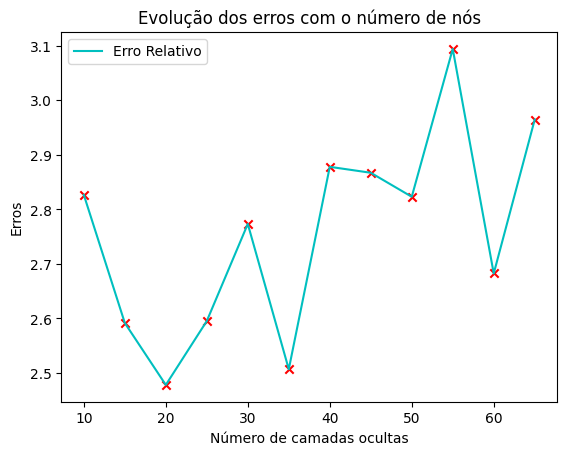

[2.826566878696847, 2.591722500288061, 2.478184188508597, 2.595329800299939, 2.773257071741112, 2.5069218788991523, 2.877918335168817, 2.867029062286736, 2.823033806167291, 3.0939942499262716, 2.682449051847225, 2.9645745639780112]


In [45]:
plt.plot(n, erro_relativo_n, c='c')
plt.scatter(n, erro_relativo_n, marker='x', c='r', label = 'Pontos')
plt.title('Evolução dos erros com o número de nós')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['Erro Relativo'])
plt.show()
print(erro_relativo_n)